# Python for Data Science & Analysis 
## Notes 3.1, Introduction to Pandas

## Objectives
* import pandas
* write a program which uses pandas to
    * construct a dataframe via reading a dataset
    * remove missing data
    * obtain a subset of columns using list indexes

## What are the python data science and analysis libraries?

* NumPy
    * fast lists ( aka. arrays)
* Pandas
    * provides single-machine dataframes (aka. tables)
* Seaborn & matplotlib
    * visualization
    
    
* Spark
    * query over distributed file systems 
* plotly
    * interactive visuals
* scipy, sklearn, tensorflow, pytorch, statsmodels
    * scientific & statistical programming
* Aside:
    * NB. sqlite3 is written in C

## Why do we *need* to use them?

Python is very very very slow & memory inefficient

In [ ]:
from random import random


In [ ]:
dataset = []

for _ in range(1_000_000):
    dataset.append(random())
    

In [ ]:
%%timeit
   
total = 0

for x in dataset:
    total += x

In [ ]:
import numpy as np


In [ ]:
ds = np.random.uniform(0, 1, 1_000_000)


In [ ]:
%%timeit

ds.sum()


In [ ]:
22E-3 / 500E-6 

Note here the python `for` loop is *44x* slower than the equivalent `.sum()` using `numpy`. 

## How do these other libraries beat python?

They aren't python... they are written in FORTRAN and C. So when you call `.sum()` you are *NOT* running `python` code, by mostly FORTRAN code. 

If you use python keywords (eg., `for`) your program will be very slow. These libraries are not *written in python*, they are compiled from other languages and are "available" from python. 

### Python is very very very slow & memory inefficient

Python uses $10\%$ more memory:

In [ ]:
import sys
100 * round(1 -  ds.nbytes / sys.getsizeof(dataset), 1)


And `NumPy` is, here, $10$x faster... (often much more than this...)

In [ ]:
#     3.7 ms / 404 µs
round(3.7E-3/404E-6, 1)


# Part 1a: Introduction to Pandas

## What is Pandas for?

Pandas uses fast FORTRAN and C code to **provide table-like querying and processing in python**. 

Pandas is a **fast, powerful, flexible** and easy to use open source **data analysis and manipulation tool**.

ref: https://pandas.pydata.org/

## When should I use pandas (vs., spark, dask, etc.)?

Pandas is for single-machine exploratory data investigation (& analytical processing). It is useful and performant when dealing with medium-sized datasets (ie., < RAM-of-Machine). 

Spark (and distributed libraries) is for programmatic data manipulation (eg., data engineering pipelines) and analytical investigation "at large scale". 

Even if you have a spark install, it is typically best to use pandas for the exploratory phase; and move to spark when requiring the relevant queries to run over massive datasets.

## How should I quickly explore data?

If you have a big distributed system (eg., spark) -- or a massive amount of data -- you can get very far by taking a smaller random sample and working with this sample on a single machine. 

Eg., 2 TB dataset in spark -> sample 1 GB of rows at random -> csv file

Then just work with the csv file, until you've produced your analysis, then run on all data.

## How do I import Pandas?

In [1]:
import pandas as pd

...in python, most data analysis libraries are imported and **renamed to enable abbreviated code**....

## How does pandas provide SQL-like operations in python?

##### Aside: this code obtains the titanic csv for this notebook

In [3]:
from pathlib import Path
import seaborn as sns

if not Path('datasets/titanic.csv').exists():
    print("please place the titanic csv in the datasets folder")
    sns.load_dataset('titanic').to_csv('titanic.csv', index=False)

(demo)

In [128]:
ti = pd.read_csv('datasets/titanic.csv')
ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


* `SELECT mean(survived), class FROM df GROUP BY class`
* Give me the rates of survival, on the titanic, by class:

In [7]:
ti['survived'].groupby(ti['class']).mean()

class
First     0.629630
Second    0.472826
Third     0.242363
Name: survived, dtype: float64

...this is just to provide a sense of the capabilities of pandas...

## Aside: What data structure does Pandas provide?

Pandas provides a *dataframe* which is a table, *stored*, in column-order.

Relational databases store data in row-order:

In [9]:
#      (ID, Age, Name), ...
db = [(1, 18, "Michael"),(2, 28, "Lucie"),(3, 30, "Chris")]


In software and data engineering application you typically want a subset of rows: 

In [10]:
db[0:2] # the first two rows


[(1, 18, 'Michael'), (2, 28, 'Lucie')]

In typical applications which use relational databases, tables have $<20$ columns; and we are typically including all columns and filtering on rows.

In analytical applications, you may have $>>20$ columns, and  you will often want subsets of them:

In [12]:
#      ID         Age            Name
df = [(1, 2, 3), (18, 28, 30), ("Michael", "Lucie", "Chris")]


The last two columns:

In [13]:
df[-2:]

[(18, 28, 30), ('Michael', 'Lucie', 'Chris')]

## Reading from a Database

Pandas can import data from a relational database:

##### Aside: this code saves the titanic csv in a relational database, for illustration

In [ ]:
from pathlib import Path
import pandas as pd
import sqlite3

if not Path('titanic.db').exists():
    with sqlite3.connect('titanic.db') as db:
        pd.read_csv('datasets/titanic.csv').to_sql('titanic', db, index=False)

If we have a relational databases, eg., `titanic.db`, then below we can load directly into pandas, 

In [ ]:
db = sqlite3.connect("titanic.db")

pd.read_sql_query("""
    SELECT * 
    FROM titanic
    WHERE age >= 40 AND survived = 1 AND class = "Third"
    
""", db)

# Part 1b: Using Pandas

## How do I show a sample of rows?

A random sample of rows:

In [37]:
ti.sample(10, random_state=3) # random rows

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
395,0,3,male,22.0,0,0,7.7958,S,Third,man,True,NaN,Southampton,no,True
85,1,3,female,33.0,3,0,15.8500,S,Third,woman,False,NaN,Southampton,yes,False
201,0,3,male,NaN,8,2,69.5500,S,Third,man,True,NaN,Southampton,no,False
542,0,3,female,11.0,4,2,31.2750,S,Third,child,False,NaN,Southampton,no,False
702,0,3,female,18.0,0,1,14.4542,C,Third,woman,False,NaN,Cherbourg,no,False
51,0,3,male,21.0,0,0,7.8000,S,Third,man,True,NaN,Southampton,no,True
237,1,2,female,8.0,0,2,26.2500,S,Second,child,False,NaN,Southampton,yes,False
548,0,3,male,33.0,1,1,20.5250,S,Third,man,True,NaN,Southampton,no,False
527,0,1,male,NaN,0,0,221.7792,S,First,man,True,C,Southampton,no,True
157,0,3,male,30.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


Head provides the first `n`:

In [38]:
ti.head(3) # first 3 rows


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True


In [39]:
ti.tail(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
881,0,3,male,33.0,0,0,7.8958,S,Third,man,True,NaN,Southampton,no,True
882,0,3,female,22.0,0,0,10.5167,S,Third,woman,False,NaN,Southampton,no,True
883,0,2,male,28.0,0,0,10.5000,S,Second,man,True,NaN,Southampton,no,True
884,0,3,male,25.0,0,0,7.0500,S,Third,man,True,NaN,Southampton,no,True
885,0,3,female,39.0,0,5,29.1250,Q,Third,woman,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.7500,Q,Third,man,True,NaN,Queenstown,no,True


## Should I use Sample or  Head for exploration?

`.sample` provides a random sampling of rows, which is typically much more representative than `.head`

Use `.sample` to get a quick insight into what kinds of data a dataset contains. 

## How do I select columns?

In [40]:
dataset = {
    'Age': [18, 21, 33, 49],
    'Name': ["Michael", "Alice", "Eve", "Bob"]
}

dataset['Age']

[18, 21, 33, 49]

Pandas uses python's indexing syntax, columns are selected by name:

In [42]:
type(ti)

pandas.core.frame.DataFrame

In [43]:
type(ti['age'])

pandas.core.series.Series

In [45]:
ti[['age', 'fare']]

,age,fare
0,22.0,7.2500
1,38.0,71.2833
2,26.0,7.9250
3,35.0,53.1000
4,35.0,8.0500
...,...,...
886,27.0,13.0000
887,19.0,30.0000
888,NaN,23.4500
889,26.0,30.0000


Unlike in python, you can select mulitple columns using a list of column names:

In [ ]:
ti[ ['age', 'fare'] ] #var[ index ]   <- index = ['age', 'fare']


...here we use the *list* `['age', 'fare']` as an *index* into `ti`. 

You can apply function to these, using standard `.` notation:

In [49]:
ti[ ['age', 'fare'] ].mean()[:]

age     29.699118
fare    32.204208
dtype: float64

In [51]:
ti['embark_town'].value_counts().to_frame()

,embark_town
Southampton,644
Cherbourg,168
Queenstown,77


## Exercise (10-15 min)

* create your own notebook
* import pandas
* using `.read_csv()` open the `titanic.csv`
* show a sample of `6` rows, and show the first `1` row
    * HINT: `.sample()`, `.head()`
* select:
    * the 'embark_town' column, and show a sample of three rows
    * the 'alive' column, and show a sample
    * both, the 'pclass' and 'age' columns, and show a sample
    * try, `.mean()` on the 'fare' column
    * try `.value_counts()` on the 'embark_town' column
    * Have a look at someother methods (e.g. `describe`, `corr`, `isna`, )

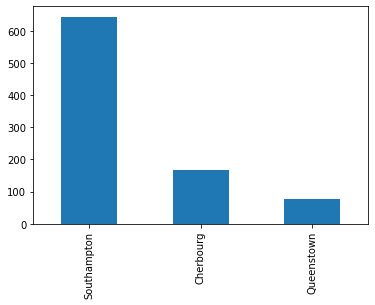

In [60]:
ti['embark_town'].value_counts().plot(kind='bar');

In [57]:
ti['fare'].corr(ti['age'])

0.09606669176903888

In [55]:
ti.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


# Part 2: Preparing Data in Pandas

## How do I inspect the data types and columns (ie., schema)?

When using a dataframe library (eg., pandas, spark) we are typically converting datasets into dataframes. To do this the library will infer your column data types. 

From `.info` we get: 
* column names
* counts
* inferred data type
    * potential problem: it may not infer the correct type
    * eg., below, the `survived` column ought be read `bool`
    * sometimes algorithms, eg., with plotting, require columns types to be correct

In [61]:
ti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


Here we can see that $891$ is the maximum number of entires any column has, but eg., `age` has fewer -- and so, age has missing data. 


`object` here means discrete, categorical data that has no "deeper" inference made -- treating each value as a separate category. 


Note above `survived` has been inferred *incorrectly*, it is not an integer (ie., a continuous measurement) but a binary category (ie., `object` or `bool`). 


```
#   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64 
 
col# colname     count()          coltype
```

## What problems does misinferred column types cause?

When a column type is misinferred, it can affect how libraries handle the data. For example, the `plot` feature of a dataframe will use the column type to infer the plot type and how to display the information. 


In [ ]:
ti = pd.read_csv('datasets/titanic.csv')

In [67]:
ti.plot(kind='bar', x='age', y='survived')

TypeError: no numeric data to plot

The following code replaces the `survived` column with the `survived` column converted to bool:

In [129]:
ti['survived'] = ti['survived'].astype(bool)

In [65]:
ti.dtypes

survived          bool
pclass           int64
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

## How do summarize data with pandas?

Summary of continous (real-valued) columns:

In [70]:
ti.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


Summary of categorical columns is not as easy....

In [71]:
ti.describe(include = ['object', 'bool'])

,survived,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
count,891,891,889,891,891,891,203,889,891,891
unique,2,2,3,3,3,2,7,3,2,2
top,False,male,S,Third,man,True,C,Southampton,no,True
freq,549,577,644,491,537,537,59,644,549,537


In [72]:
ti['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [73]:
ti['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

## Aside: How do I select columns by type?

The categorical columns are `object` (multi-class) and `bool` (binary):

In [74]:
ti.select_dtypes(['object', 'bool']) #dtype == data type, object = unprocessed value

,survived,sex,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,male,S,Third,man,True,NaN,Southampton,no,False
1,True,female,C,First,woman,False,C,Cherbourg,yes,False
2,True,female,S,Third,woman,False,NaN,Southampton,yes,True
3,True,female,S,First,woman,False,C,Southampton,yes,False
4,False,male,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...
886,False,male,S,Second,man,True,NaN,Southampton,no,True
887,True,female,S,First,woman,False,B,Southampton,yes,True
888,False,female,S,Third,woman,False,NaN,Southampton,no,False
889,True,male,C,First,man,True,C,Cherbourg,yes,True


## How many rows and columns are there?

Rows...

In [75]:
len(ti)

891

Rows & columns...

In [81]:
import numpy as np

In [78]:
ti.shape # (rows, columns)

(891, 15)

In [84]:
ti.select_dtypes(np.number).values.dtype

dtype('float64')

In [85]:
ti.values

array([[False, 3, 'male', ..., 'Southampton', 'no', False],
       [True, 1, 'female', ..., 'Cherbourg', 'yes', False],
       [True, 3, 'female', ..., 'Southampton', 'yes', True],
       ...,
       [False, 3, 'female', ..., 'Southampton', 'no', False],
       [True, 1, 'male', ..., 'Cherbourg', 'yes', True],
       [False, 3, 'male', ..., 'Queenstown', 'no', True]], dtype=object)

## How do I determine if there is missing data?

In [ ]:
ti = pd.read_csv('datasets/titanic.csv')


We run `.isna` (is not-available) across every entry:

In [86]:
ti.isna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [91]:
demo = pd.DataFrame(
    { "age": [np.NaN, None, 0.1, 100]}
)

In [93]:
True + True + False

2

In [94]:
demo.isna().sum()

age    2
dtype: int64

Then we sum down the columns, treating `True` as `1` (and `False` as `0`)

In [98]:
 ti.isna().sum().sort_values(ascending=False)
#df -> df -> ds -> ds

deck           688
age            177
embarked         2
embark_town      2
survived         0
pclass           0
sex              0
sibsp            0
parch            0
fare             0
class            0
who              0
adult_male       0
alive            0
alone            0
dtype: int64

... and therefore the `.sum` is the count of missing data (ie., `NA` is `True`)

## Aside: What is the problem with missing data?

In [105]:
def predict_survival(fare, age):
    if (fare > 50) | (age <= 12):
        return 1
    else:
        return 0

When dropping rows (, columns) we want to retain *only* those rows that we can use with our analysis.

Eg., consider the function above, we need *both* the `fare` and the `age`, and so, we must only have rows with them *both*.

In the case of the titanic dataset, this means dropping quite a large number of rows. 

In [107]:
(ti['fare'] > 50) | (ti['age'] <= 12)

0      False
1       True
2      False
3       True
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [104]:
predict_survival(ti['fare'], ti['age'])

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

#### Aside: The rule above is fairly accurate,

In [ ]:
predictions = []
error = 0
for f, a, s in ti[['fare', 'age', 'survived']].values:
    predictions.append( (s, predict_survival(f, a)) )
    
    
    if s != predict_survival(f, a):
        error += 1

In [ ]:
1 - error/len(predictions)

## How do I remove missing data with pandas?

Remove rows with missing data:  (axis = 0, *means* rows)

In [108]:
ti_wo_rows = ti.dropna(axis=0)

print("We removed: ", len(ti) -  len(ti_wo_rows), "rows")


We removed:  709 rows


<font color="red">This removes 709 rows across **all** columns!</font>

Remove columns with missing data:

In [109]:
ti_wo_col = ti.dropna(axis=1)


In [110]:
print("We removed: ", len(ti) -  len(ti_wo_col), "rows")

# but how many cols removed? let's use .shape attribute, or the info() method


We removed:  0 rows


In [111]:
ti_wo_col.shape

(891, 11)

In [ ]:
ti_wo_col.shape


In [ ]:
ti_wo_col.info()


In [ ]:
ti.info()


In [112]:
ti.drop(columns=['deck'])

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,False,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,True,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,True,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,True,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,False,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,no,True
887,True,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,False,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,no,False
889,True,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [118]:
ti[(~ti['age'].isna()) & (~ti['deck'].isna())]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,True,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,True,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,False,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,True,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,True,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,True,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,False,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,True,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,True,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


## Aside: How do I drop a specific column?

Note, that it would have been better to drop the `deck` column before dropping all the other missing rows, as the deck column is mostly empty (and therefore causes a lot of rows to be dropped). 

The `ti.drop(columns=['deck'])` command will drop the named columns. 

## Aside: Alternative strategies for missing data

* rather than dropping rows we could substitue missing entires for:
    * median(, mean,), modes
    * predicted values (eg., via linear regression)

### Exercise (25 min)
* Context:  What improved your chances of survival on the titanic?

#### Part 1: Investigate the observations in the dataset
The goal of this exercise is to expand on your solution to the prior one, including additional statistical information and information on missing data. 


* load the titanic dataset using `read_csv`
* with `ti`, produce a report which shows interesting columns, samples, and descriptive stats
* HINT, use the following:
    * `df['age'].mean()`
    * `.info()`, `.sample()`, `.mean()`, `.std()`, `.median()`, `.head()`, `.describe()`
* include in the report *whether* there is missing data
    * HINT: `.isna().sum()`
    

#### Part 2: Prepare the dataset for analysis
* define `clean = ti.dropna()` to remove missing data
    * remove the *rows*
* perform the analysis above
    * compare and contrast
* what results are different, and why?
    * ie., how has removing data affected the results?  
* does cleaning the data bias the analysis?
    * if so, do you have any ideas for how to over come that?
    
* EXTRA:
    * What happens if you drop `deck` before `dropna()`.. does this show as much statistical biasing?

In [122]:
ti.mean(numeric_only=True)

survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [126]:
ti.dropna(inplace=True)

In [127]:
ti

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,True,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,True,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,False,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,True,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,True,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,True,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,False,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,True,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,True,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [132]:
ti.describe()

,pclass,age,sibsp,parch,fare
count,891.000000,714.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400
50%,3.000000,28.000000,0.000000,0.000000,14.454200
75%,3.000000,38.000000,1.000000,0.000000,31.000000
max,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
ti.drop(columns=['deck']).dropna().describe()

,pclass,age,sibsp,parch,fare
count,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.240169,29.642093,0.514045,0.432584,34.567251
std,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,1.000000,20.000000,0.000000,0.000000,8.050000
50%,2.000000,28.000000,0.000000,0.000000,15.645850
75%,3.000000,38.000000,1.000000,1.000000,33.000000
max,3.000000,80.000000,5.000000,6.000000,512.329200


In [137]:
ti['survived'].mean() - ti.drop(columns=['deck']).dropna()['survived'].mean()

-0.020655998184088087